In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

В качестве распределения для примера я выбрал $\chi^2_k$, так как найти значения дисперсии и среднего для экзотических распределений оказалось не столь просто.

Сначала сгенерируем случайные значения и нарисуем график плотности распределения, гистограмму и ядерное сглаживание

In [19]:
k=2
chi2_rv = sts.chi2(k)
chi2_sample = chi2_rv.rvs(1000)

x = np.linspace(0,5,100)
pdf = beta_rv.pdf(x)

df = pd.DataFrame(chi_random, columns=['KDE'])
ax = df.plot(kind='density', color="green")

plt.plot(x, pdf, label="theoretical pdf", color="red")
plt.hist(chi2_sample, normed=True, label="actual histogram", color="blue")
plt.title("PDF, KDE and histogram ($\chi^2_k$)")
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

NameError: name 'beta_rv' is not defined

Теперь необходимо определить функцию для центральной предельной теоремы, чтобы не дублировать код для выборок разного объема. Функция берет случайные выборки заданного объема из общей выборки, которую получает на вход. Так как нам необходимо нарисовать график распределения выборочных средних, то мы вычисляем для каждой локальной выборки среднее и записываем в массив. Затем рисуем гистограмму средних и график плотности распределения (набор агрументов для графика плотности распределения тоже задается входным параметром функции).

In [25]:
def central_theorem(mu, sigma, x, sample, sample_size):
    arithmetic_means = []
    
    for i in range(len(sample)):
        local_sample = sample[np.random.randint(0,len(sample),sample_size)]
        arithmetic_means.append(np.mean(local_sample))

    d = sigma/math.sqrt(sample_size)
    norm_rv = sts.norm(mu,d)

    local_mu = np.mean(arithmetic_means)
    local_sigma = np.std(arithmetic_means)
    
    print ('Теоретическое среднее и теоретическое отклонение: {:.2f} {:.2f}'.format(mu, d))
    print ('Приближенное среднее и приближенное отклонение: {:.2f} {:.2f}'.format(local_mu, local_sigma))
    
    bottom_val = local_mu - 2*local_sigma
    top_val = local_mu + 2*local_sigma

    interval_length = top_val - bottom_val
    
    print ('Доверительный интервал: {:.2f} - {:.2f} = {:.2f}'.format(top_val, bottom_val, interval_length))
    
    plt.hist(arithmetic_means,normed=True,label='avarages')
    plt.plot(x,norm_rv.pdf(x),label='theoretical pdf', color="red")
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

Определяем $\mu$ и $\sigma$ для центральной предельной теоремы, чтобы нарисовать график нормального распределения

In [21]:
mu = float(k)
sigma = math.sqrt(2*k)
print (mu, sigma)

2.0 2.0


Теоретическое среднее и теоретическое отклонение: 2.00 0.89
Приближенное среднее и приближенное отклонение: 1.99 0.86
Доверительный интервал: 3.72 - 0.26 = 3.46


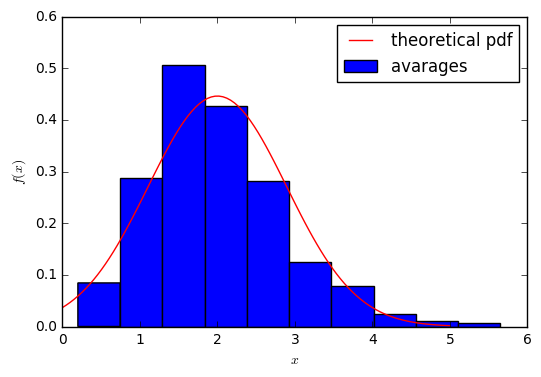

In [22]:
central_theorem(mu, sigma, x, chi2_sample, 5)

Теоретическое среднее и теоретическое отклонение: 2.00 0.63
Приближенное среднее и приближенное отклонение: 1.97 0.58
Доверительный интервал: 3.12 - 0.82 = 2.30


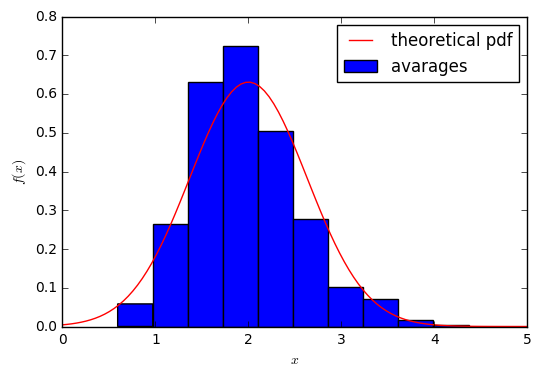

In [23]:
central_theorem(mu, sigma, x, chi2_sample, 10)

Теоретическое среднее и теоретическое отклонение: 2.00 0.28
Приближенное среднее и приближенное отклонение: 1.98 0.27
Доверительный интервал: 2.52 - 1.45 = 1.07


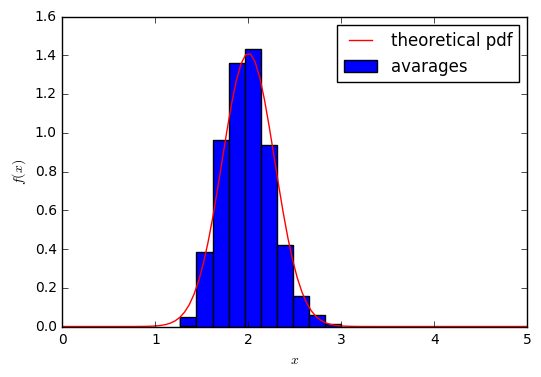

In [24]:
central_theorem(mu, sigma, x, chi2_sample, 50)

Как мы видим, центральная предельная теорема работает.
С увеличением количества выборок точность оценки повышается, мы можем видеть это на графике и на значениях доверительного интервала, который сужается.